### House Price Prediction Model Using Random Forest and Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('bmh')

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print('Null value % is\n',round(data.isnull().sum()/data.count()*100))

Null value % is
 Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      22.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64


In [6]:
#lets see columns with any null value

In [7]:
cols_with_missing = [col for col in data.columns if data[col].isnull().any()] 
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
# To find whether data columns contain enough data or not

In [9]:
col =data[[column for column in data if data[column].count()/len(data)>=0.2]]
del col['Id']
print('List of column which has lots of missing data:',end='')
for i in data.columns:
    if i not in col.columns:
        print(i,end=' ,')
print('\n')

List of column which has lots of missing data:Id ,Alley ,PoolQC ,Fence ,MiscFeature ,



In [10]:
# we don't need these features becauuse they don't have enough data that can help us to
#build a model so I am going to drop it but I will save Id on another dataframe because 
#I will need it when I make prediction

In [11]:
id=data['Id']

In [12]:
data=data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [13]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

In [14]:
# Lets check the data type 

In [15]:
data.dtypes.value_counts()

object     39
int64      34
float64     3
dtype: int64

In [16]:
# we can see here we have three data types which are object, int and float.
#int and float are Numerical  data  so we can call them Numerical data and Object is categorical data
# Analyzing and processing numerical data is straightforward than the numerical one but we can process categorical data
#directly into our model thus wew have to analyze both seperately

#### 1. Numerical data

In [17]:
num_data=data.select_dtypes(include=['int64','float64'])

In [18]:
num_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [19]:
# lets check null value in in the numerical category

In [20]:
num_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [21]:
# LotFrontage, garageYrbuilt and MasVnrArea has null value so we have to deal with them

In [22]:
num_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

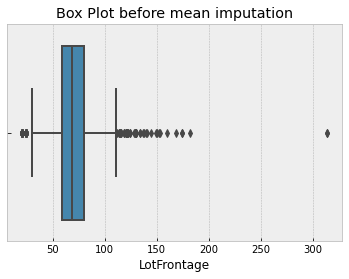

Text(0.5, 1.0, 'Box Plot After mean imputation')

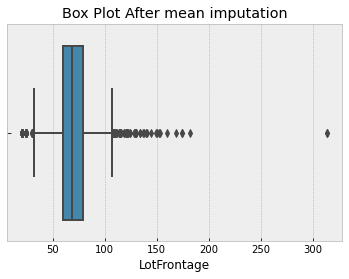

In [23]:
sns.boxplot(data=num_data,x='LotFrontage')
plt.title("Box Plot before mean imputation")
plt.show()
num_data['LotFrontage'].fillna(num_data['LotFrontage'].median(),inplace=True)
sns.boxplot(data=num_data,x='LotFrontage')
plt.title("Box Plot After mean imputation")

In [24]:
num_data['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

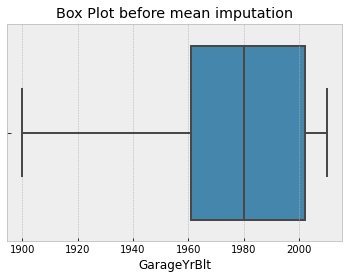

Text(0.5, 1.0, 'Box Plot After mean imputation')

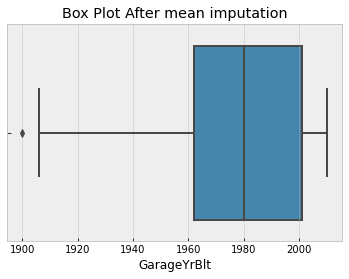

In [25]:
sns.boxplot(data=num_data,x='GarageYrBlt')
plt.title("Box Plot before mean imputation")
plt.show()
num_data['GarageYrBlt'].fillna(num_data['GarageYrBlt'].median(),inplace=True)
sns.boxplot(data=num_data,x='GarageYrBlt')
plt.title("Box Plot After mean imputation")

In [26]:
num_data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [27]:
num_data['MasVnrArea'].fillna(num_data['MasVnrArea'].median(),inplace=True)

In [28]:
corr=num_data.corr()

<AxesSubplot:>

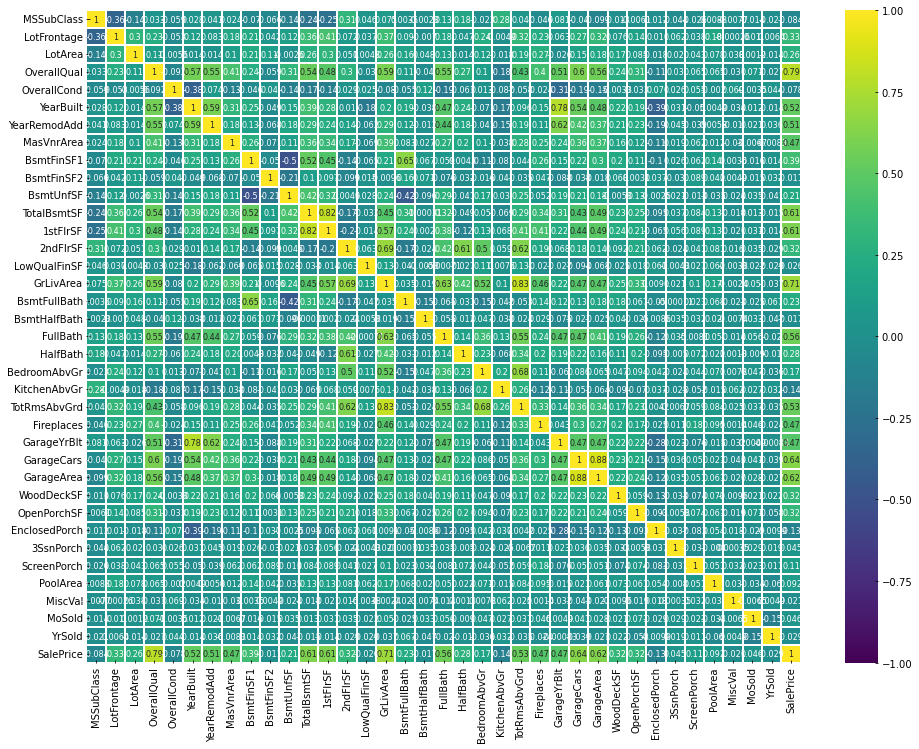

In [29]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr,annot=True,cmap='viridis', annot_kws={"size": 8},vmax=1.0, vmin=-1.0, linewidths=0.1)

In [30]:
# Pairplot
#pairplot is the best way to visualize to see correlation between columns
# As you can see this dataset contain a lot of data, if we try to visualize each column through pairplot we have 37*37 
# paiplot diagram which will take a lot of time also it makes visualization hard.
# our main goal is to build a model which will predict price of house so we can plot a pairplot based on saleprice

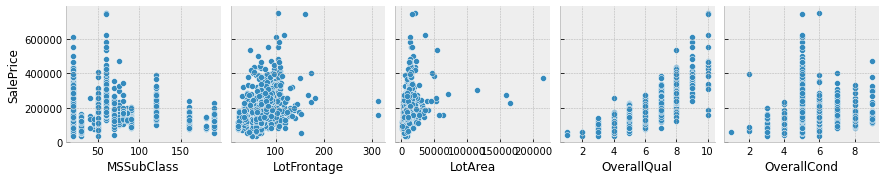

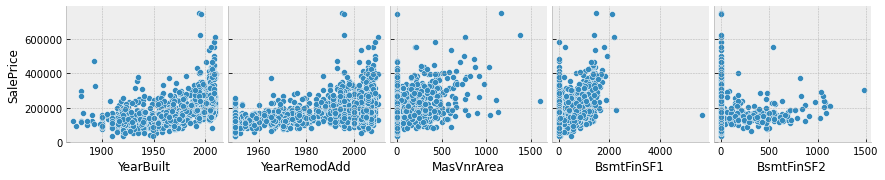

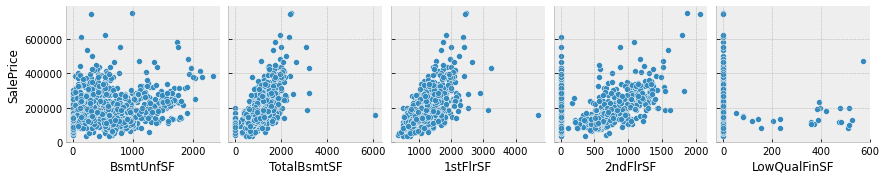

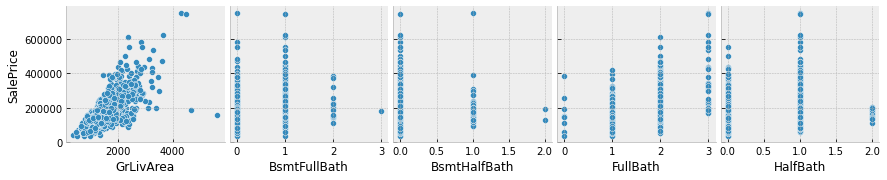

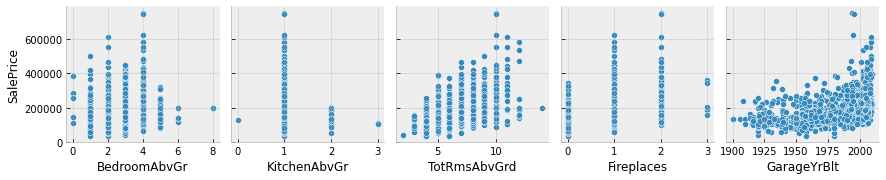

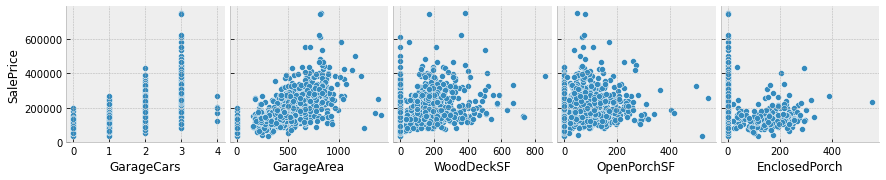

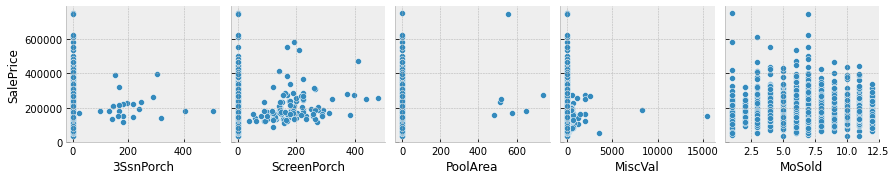

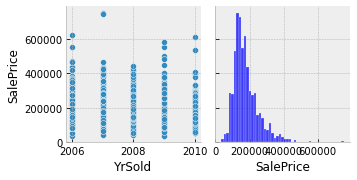

In [31]:
for i in range(0,len(num_data.columns),5):
    sns.pairplot(data=num_data,x_vars=num_data.columns[i:i+5],y_vars='SalePrice')

In [32]:
# From pairplot we can see some columns like PoolArea, MiscVal, ScreenPorch, 3SsnPorch etc has a lot of zero value
# Lets see how much value are divided it these columns using boxplot

C:\Users\gahat\AppData\Local\Temp\ipykernel_10812\145113318.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


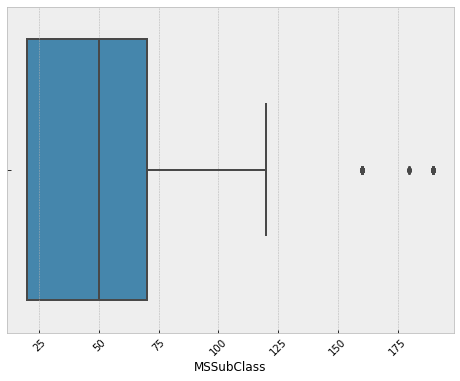

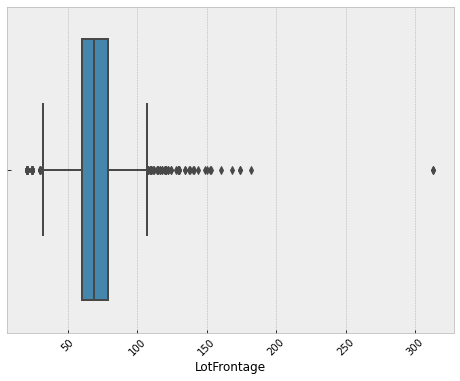

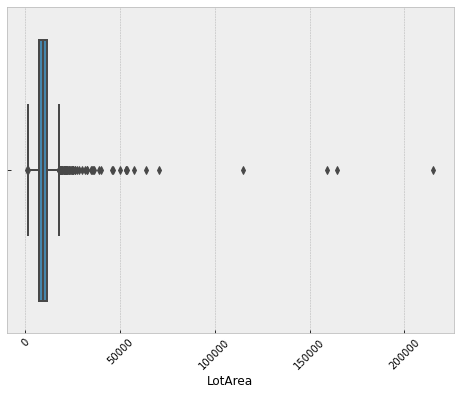

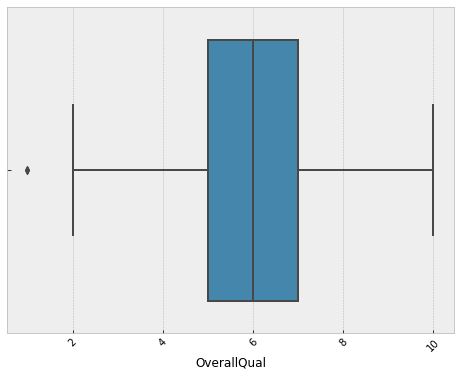

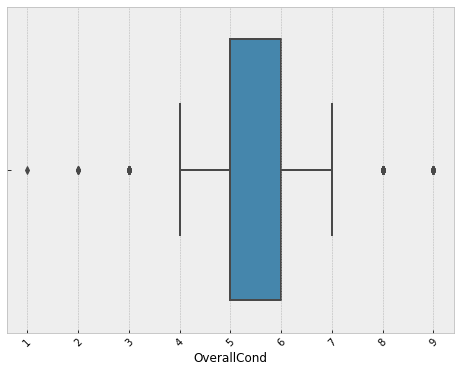

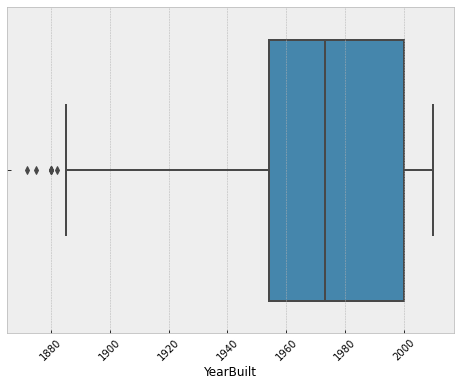

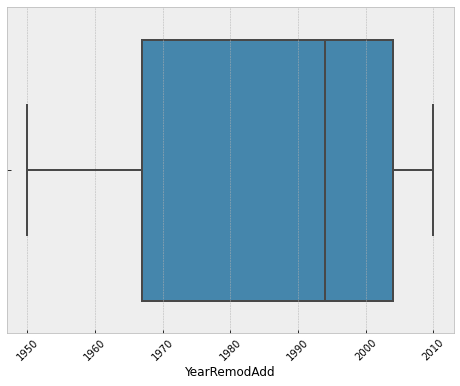

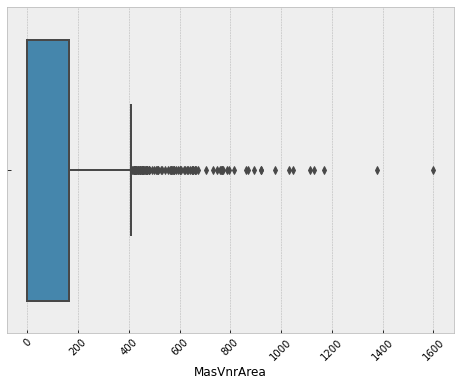

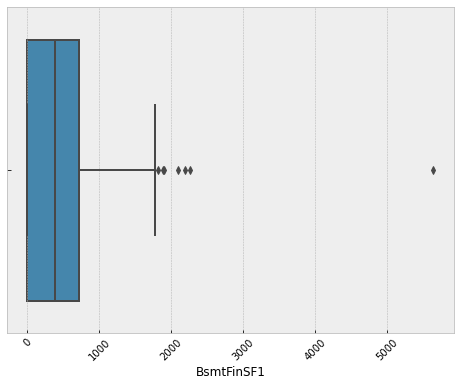

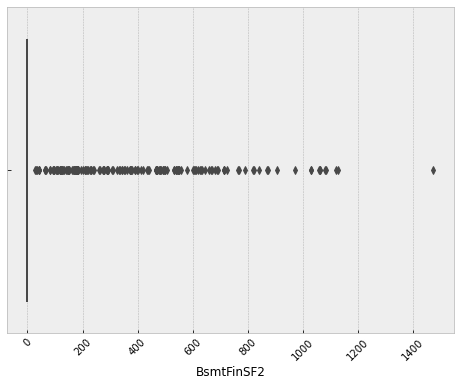

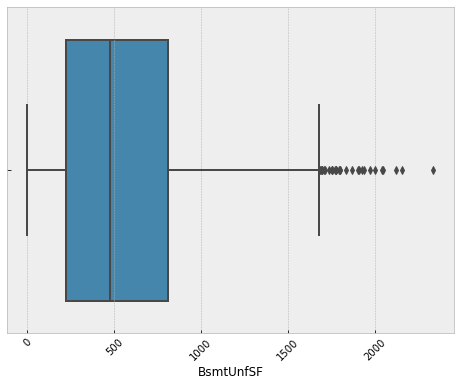

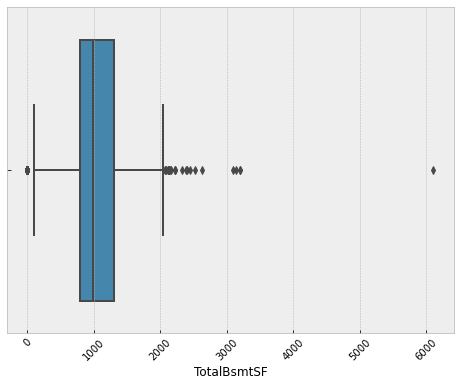

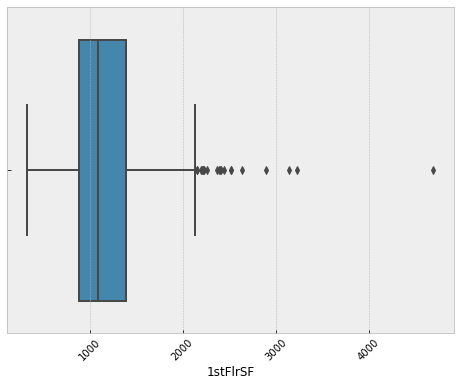

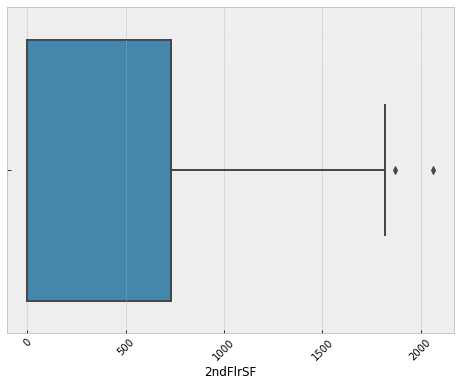

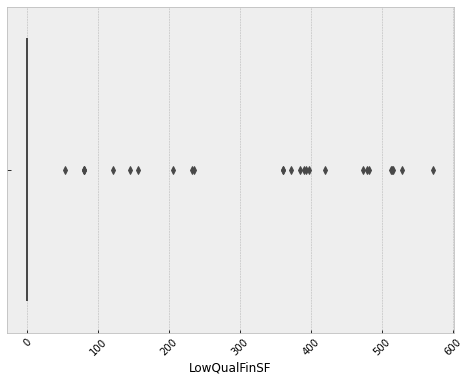

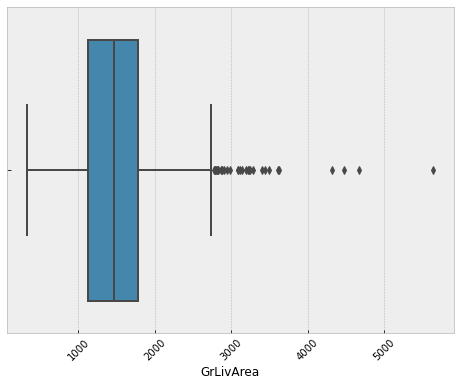

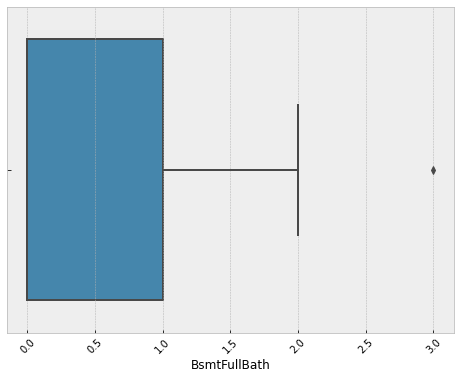

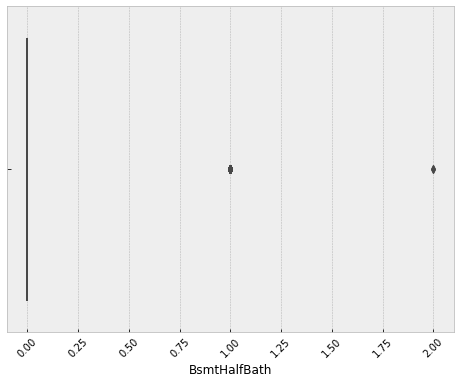

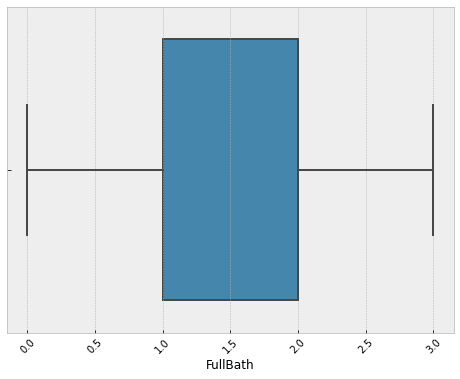

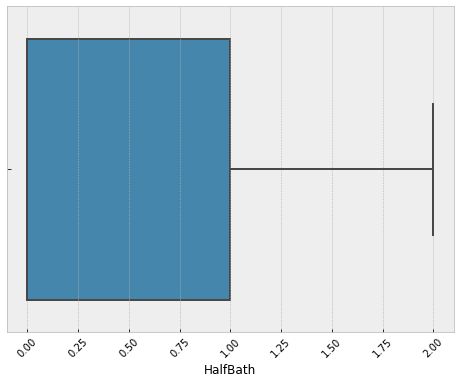

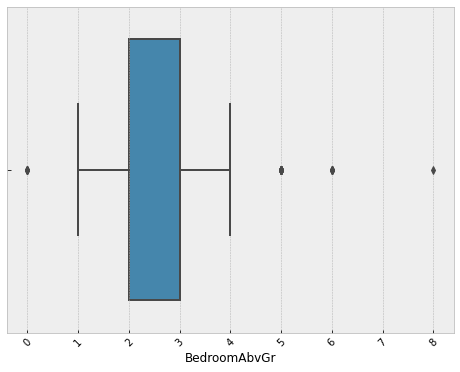

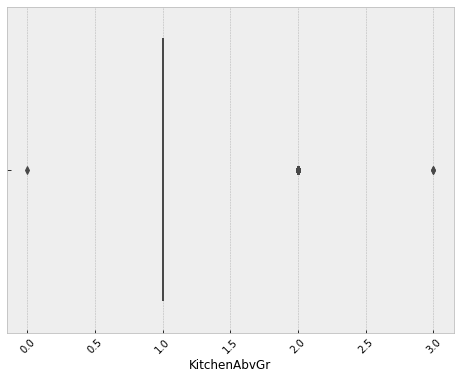

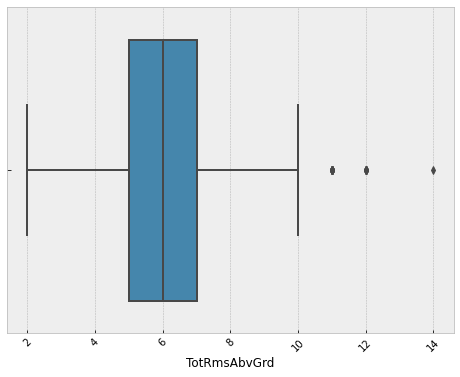

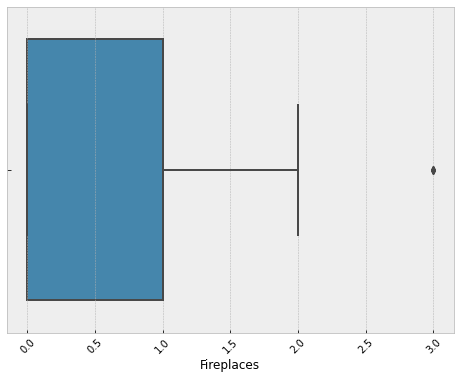

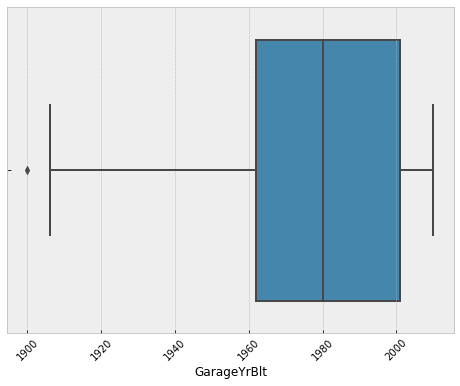

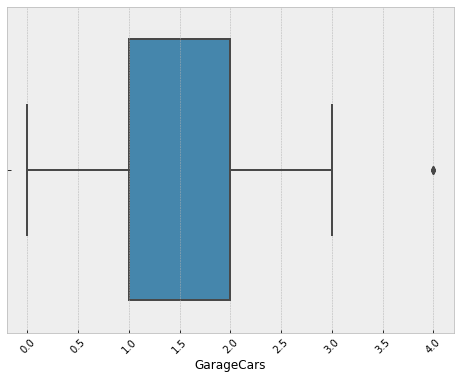

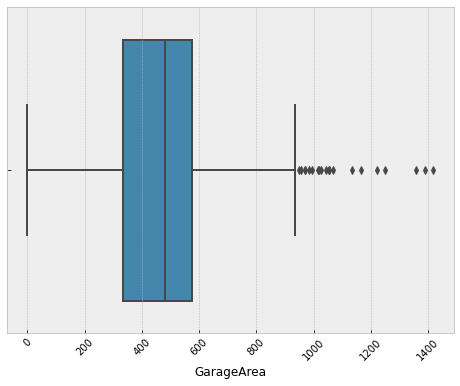

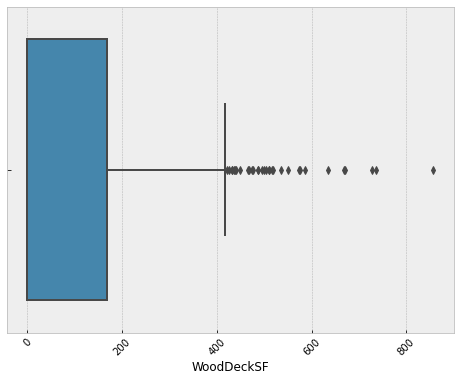

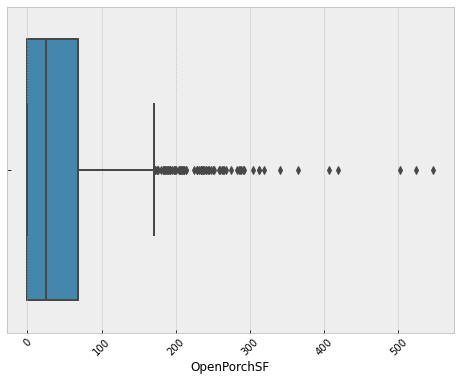

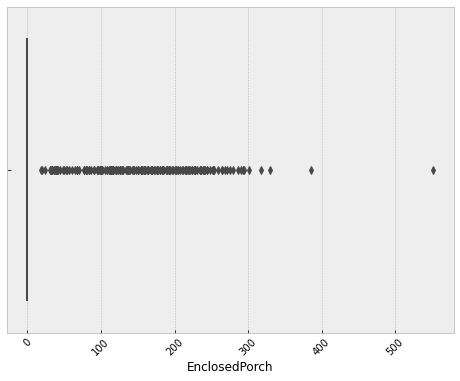

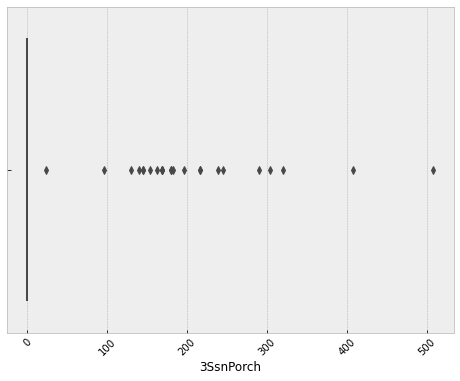

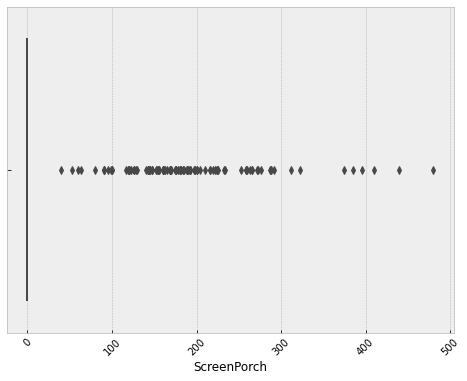

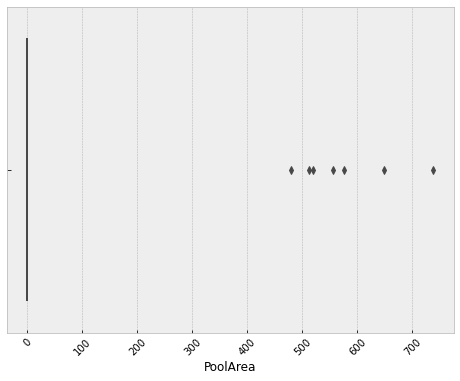

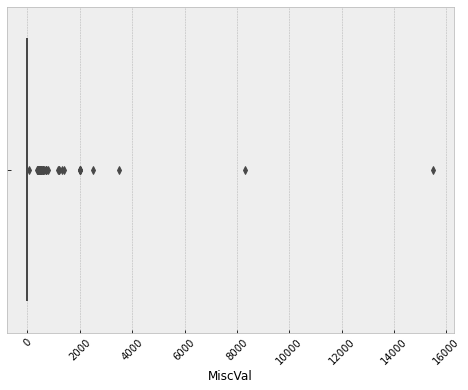

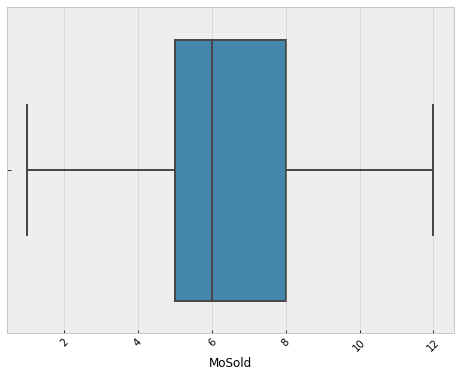

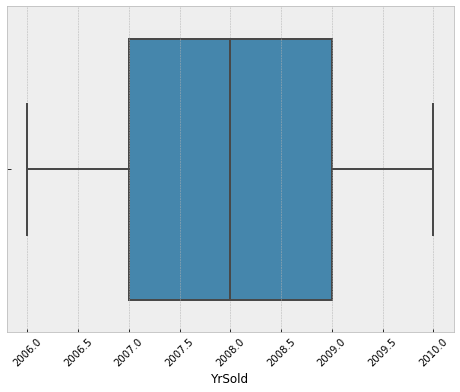

In [33]:
for i in num_data.columns[:-1]:
    plt.figure(figsize=(8,6))
    ax=sns.boxplot(data=num_data,x=num_data[i])
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xticks(rotation=45)

In [34]:
# we can see through boxplot that MiscVal,PoolArea, ScreenPorch,3SsnPorch and EnclosedPorch columns cotain only fraction 
#of data which have value more than zero, these columns won't help us predicting our model so we have to drop it.

In [35]:
num_data=num_data.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch'],axis=1)

In [36]:
#Now lets look at the correlation between SalePrice and other features

In [37]:
num_data.corr()['SalePrice'][:-1].sort_values(ascending=False)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
MoSold          0.046432
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

In [38]:
# Lets plot regression plot to see relationship between saleprice and other columns visually

In [39]:
features=[x for x in num_data.columns]

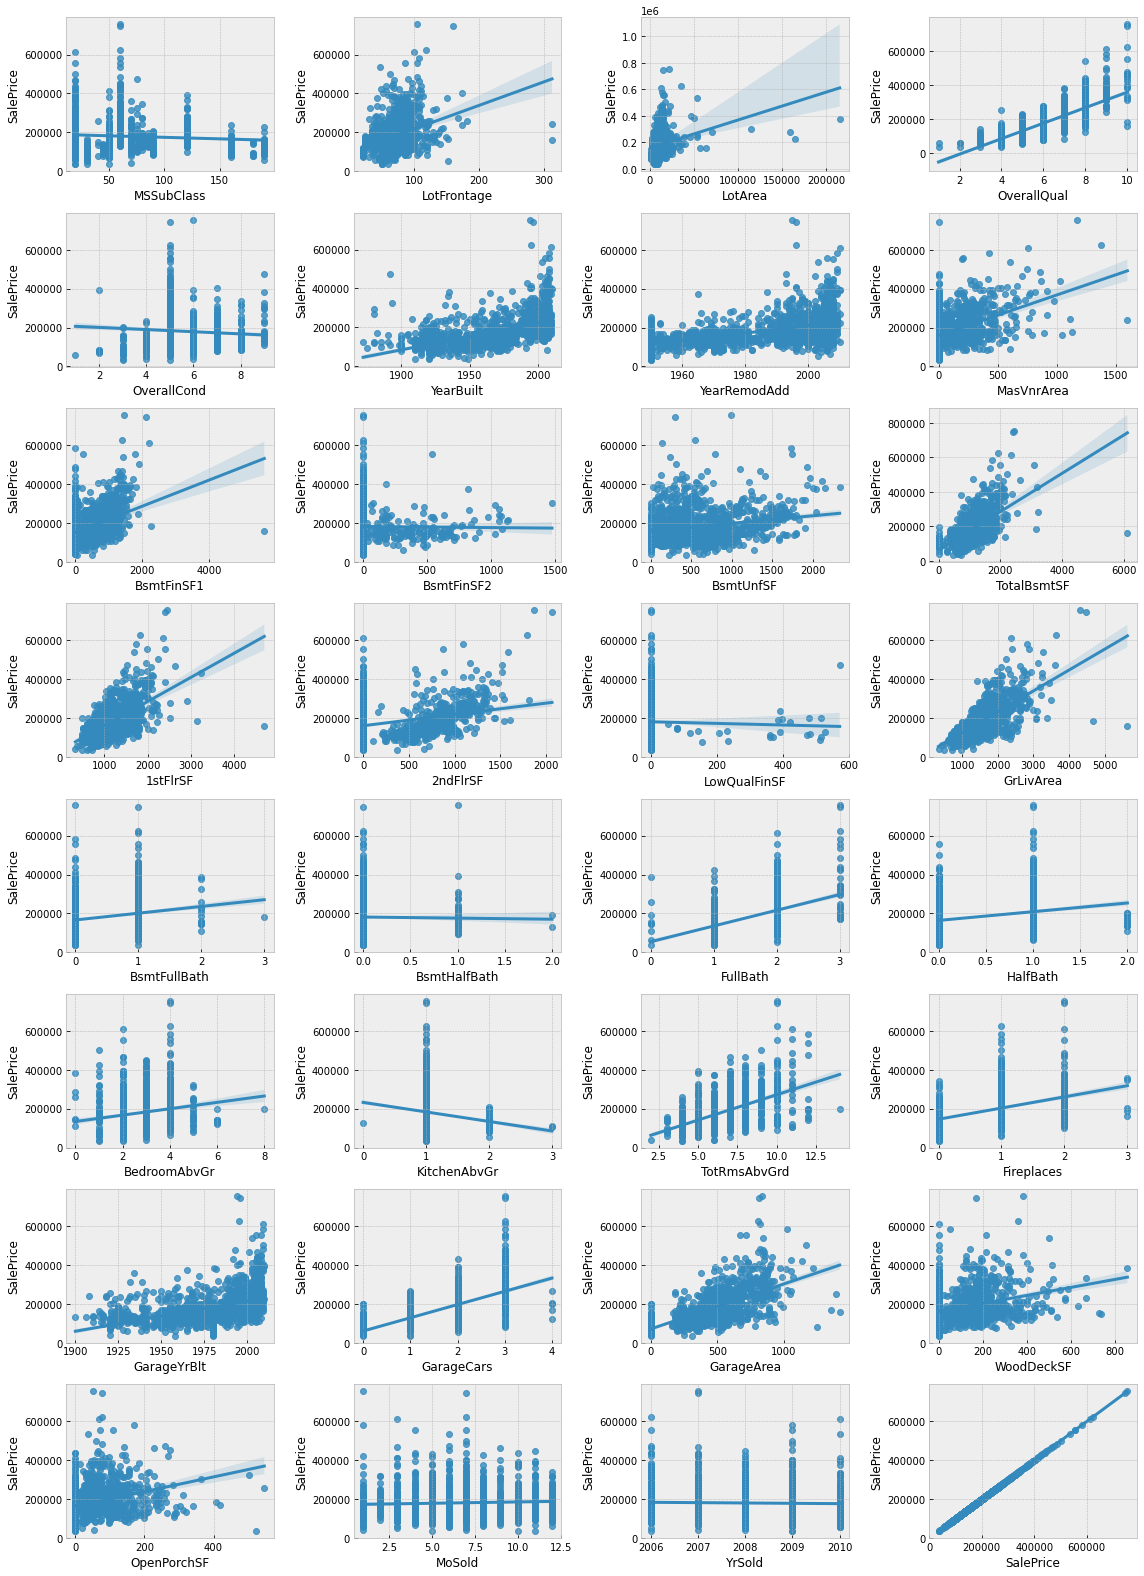

In [40]:
fig, ax = plt.subplots(round(len(features)/4),4, figsize=(16,22))
for i,ax in enumerate(fig.axes):
        sns.regplot(x=features[i],y='SalePrice',data=num_data[features],ax=ax)
fig.tight_layout()

#### Categorical Data

In [41]:
# Now lets see our categorical data

In [42]:
categ_data=data.select_dtypes(include=['object'])

In [43]:
categ_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [44]:
categ_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [45]:
# As we can see abhove there are 10 columns which contain Null value
# we have to see the data distribution and their uniqueness before we drop them

In [46]:
null_categ=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']

In [47]:
categ_data.describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          770       1379         1379       1379       1379       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           380        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

In [48]:
categ_data[null_categ].describe()

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 FireplaceQu  \
count      1423     1423         1422         1423         1422         770   
unique        4        4            4            6            6           5   
top          TA       TA           No          Unf          Unf          Gd   
freq        649     1311          953          430         1256         380   

       GarageType GarageFinish GarageQual GarageCond  
count        1379         1379       1379       1379  
unique          6            3          5          5  
top        Attchd          Unf         TA         TA  
freq          870          605       1311       1326

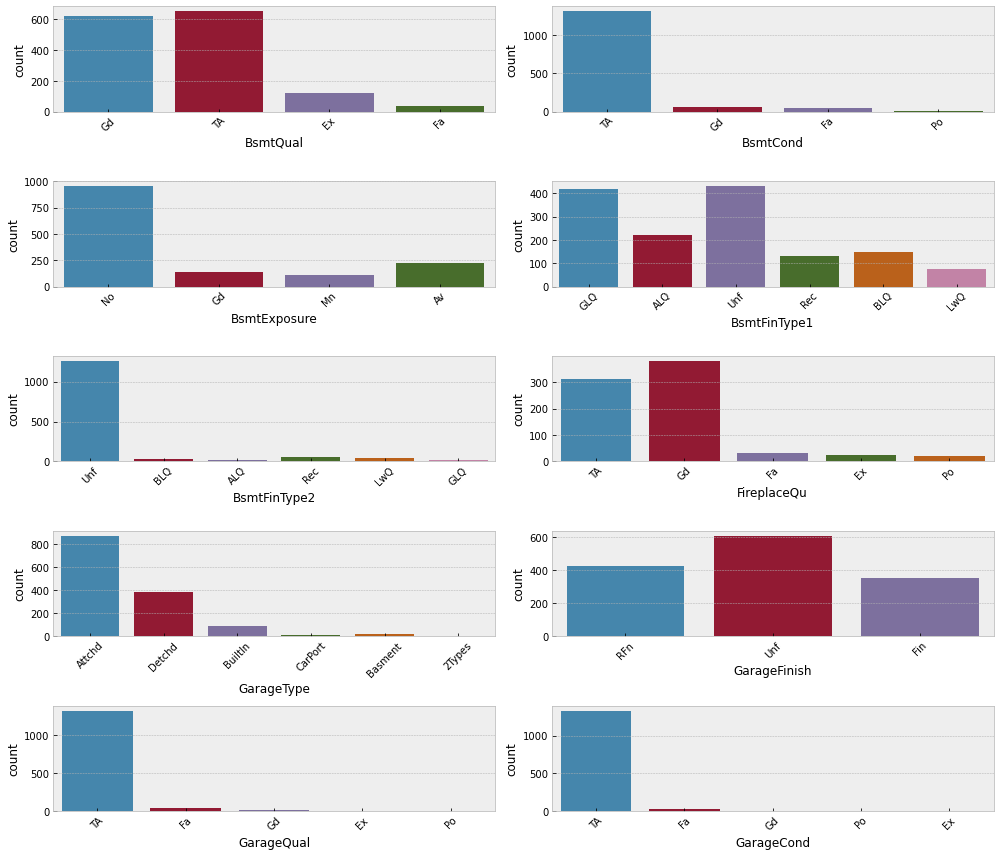

In [49]:
fig,axes =plt.subplots(round(len(null_categ)/2),2,figsize=(14,12))
for i,ax in enumerate(fig.axes):
    sns.countplot(x=null_categ[i],data=categ_data,ax=ax)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
fig.tight_layout()

In [50]:
categ_data['BsmtCond'].fillna('TA',inplace=True)
categ_data['BsmtQual'].fillna('TA',inplace=True)
categ_data['BsmtExposure'].fillna('No',inplace=True)
categ_data['BsmtFinType1'].fillna('Unf',inplace=True)
categ_data['BsmtFinType2'].fillna('Unf',inplace=True)
categ_data['GarageType'].fillna('Attchd',inplace=True)
categ_data['GarageFinish'].fillna('Unf',inplace=True)
categ_data['GarageQual'].fillna('TA',inplace=True)
categ_data['GarageCond'].fillna('TA',inplace=True)
categ_data['MasVnrType'].fillna('None',inplace=True)
categ_data['Electrical'].fillna('None',inplace=True)

In [51]:
categ_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [52]:
# Lets see all the categorical features using countplot

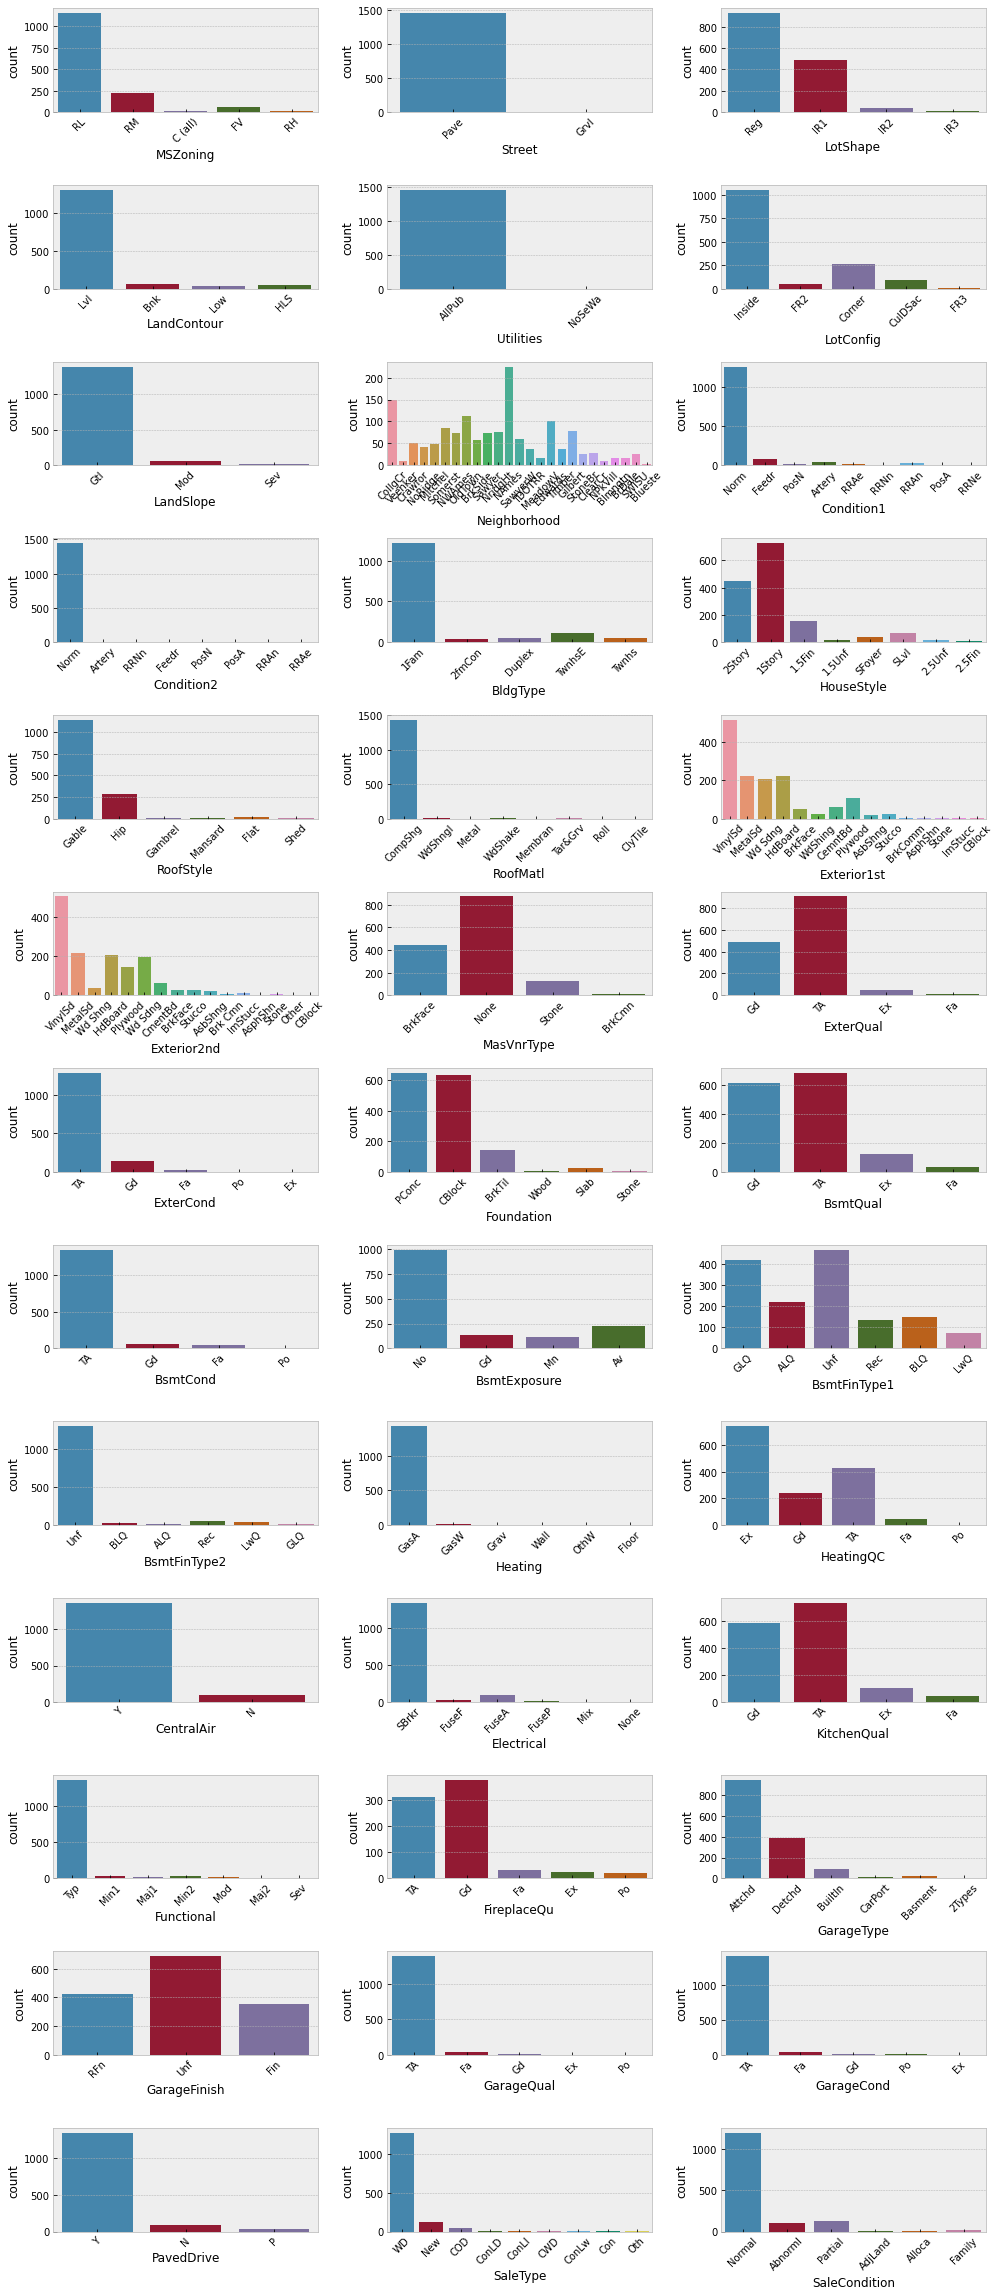

In [53]:
fig,axes =plt.subplots(round(len(categ_data.columns)/3),3,figsize=(14,32))
for i, ax in enumerate(fig.axes):
    if i< len(categ_data):
        sns.countplot(x=categ_data.columns[i],data=categ_data,ax=ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        
fig.tight_layout()

In [54]:
# FireplaceQu contain a lot of null value may be we should drop it and replace others with most frequent value.

In [55]:
categ_data=categ_data.drop('FireplaceQu',axis=1)

In [56]:
categ_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [57]:
# We can see from the graph that some categories doesn't have any  uniqueness in value
#Lets see whether it is true or not
#Categoris are, Street,Utilities,Condition2, RoofMatl, Heating,Functional etc..

In [58]:
def value_counts(col):
    a=categ_data[col].value_counts()
    return(a)

In [59]:
value=[]
for colm in categ_data:
    values=value_counts(colm)
    value.append(values)

In [60]:
value

[RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: MSZoning, dtype: int64,
 Pave    1454
 Grvl       6
 Name: Street, dtype: int64,
 Reg    925
 IR1    484
 IR2     41
 IR3     10
 Name: LotShape, dtype: int64,
 Lvl    1311
 Bnk      63
 HLS      50
 Low      36
 Name: LandContour, dtype: int64,
 AllPub    1459
 NoSeWa       1
 Name: Utilities, dtype: int64,
 Inside     1052
 Corner      263
 CulDSac      94
 FR2          47
 FR3           4
 Name: LotConfig, dtype: int64,
 Gtl    1382
 Mod      65
 Sev      13
 Name: LandSlope, dtype: int64,
 NAmes      225
 CollgCr    150
 OldTown    113
 Edwards    100
 Somerst     86
 Gilbert     79
 NridgHt     77
 Sawyer      74
 NWAmes      73
 SawyerW     59
 BrkSide     58
 Crawfor     51
 Mitchel     49
 NoRidge     41
 Timber      38
 IDOTRR      37
 ClearCr     28
 StoneBr     25
 SWISU       25
 MeadowV     17
 Blmngtn     17
 BrDale      16
 Veenker     11
 NPkVill      9
 Blueste      2
 Name: Nei

In [61]:
# Street, Utilities doesn't have uniqueness which helps us in our model so I'm going to drop them.

In [62]:
categ_data=categ_data.drop(['Street','Utilities'],axis=1)

In [63]:
categ_data.tail()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood  \
1455       RL      Reg         Lvl    Inside       Gtl      Gilbert   
1456       RL      Reg         Lvl    Inside       Gtl       NWAmes   
1457       RL      Reg         Lvl    Inside       Gtl      Crawfor   
1458       RL      Reg         Lvl    Inside       Gtl        NAmes   
1459       RL      Reg         Lvl    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  ... Electrical KitchenQual  \
1455       Norm       Norm     1Fam     2Story  ...      SBrkr          TA   
1456       Norm       Norm     1Fam     1Story  ...      SBrkr          TA   
1457       Norm       Norm     1Fam     2Story  ...      SBrkr          Gd   
1458       Norm       Norm     1Fam     1Story  ...      FuseA          Gd   
1459       Norm       Norm     1Fam     1Story  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
1455        Typ     Attchd          RFn         TA         TA          Y   
1456       Min1     Attchd          Unf         TA         TA          Y   
1457        Typ     Attchd          RFn         TA         TA          Y   
1458        Typ     Attchd          Unf         TA         TA          Y   
1459        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[5 rows x 36 columns]

In [64]:
# Lets Comapere Some of the categorical value with Saleprice

In [65]:
categ_data.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

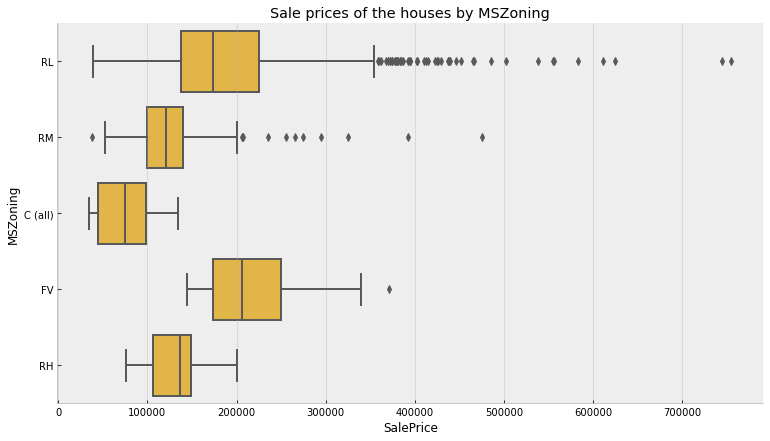

In [66]:
sns.catplot(x = 'SalePrice',
            y = "MSZoning",
            kind = "box",
            height = 6,
            aspect = 1.8,
            color = "#FBC02D",
            data = data).set(title = "Sale prices of the houses by MSZoning");

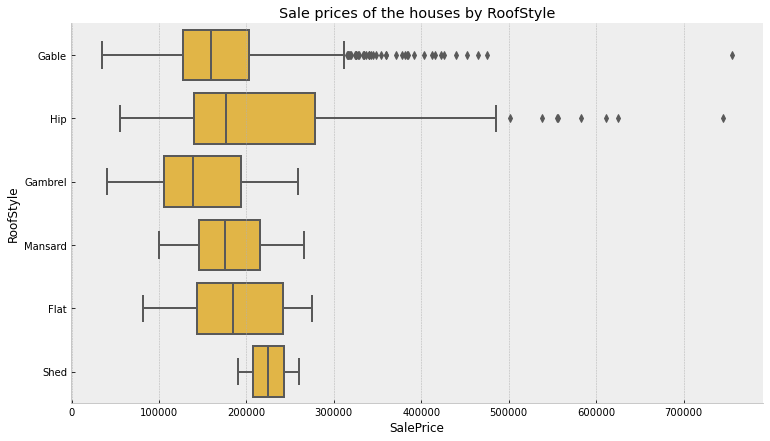

In [67]:
sns.catplot(x = 'SalePrice',
            y = "RoofStyle",
            kind = "box",
            height = 6,
            aspect = 1.8,
            color = "#FBC02D",
            data = data).set(title = "Sale prices of the houses by RoofStyle");

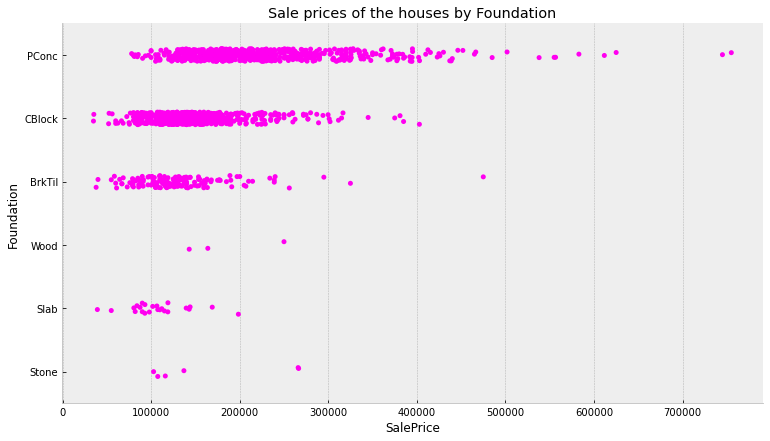

In [68]:
sns.catplot(x = 'SalePrice',
            y = "Foundation",
            kind = "strip",
            height = 6,
            aspect = 1.8,
            color = "#FF00F0",
            data = data).set(title = "Sale prices of the houses by Foundation");

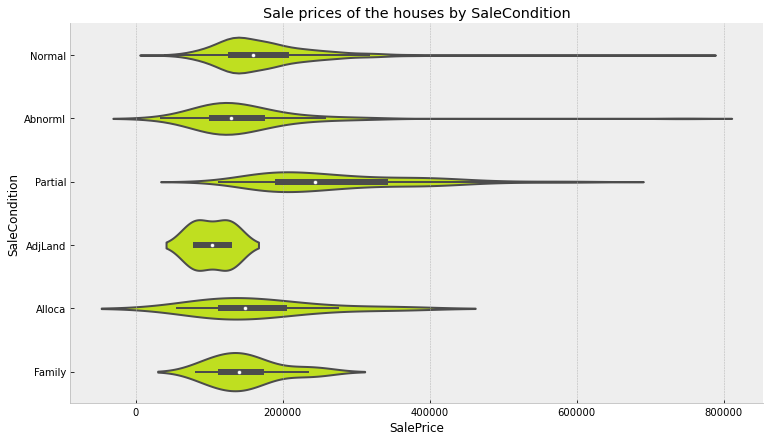

In [69]:
sns.catplot(x = 'SalePrice',
            y = "SaleCondition",
            kind = "violin",
            height = 6,
            aspect = 1.8,
            color = "#D4FF00",
            data = data).set(title = "Sale prices of the houses by SaleCondition");

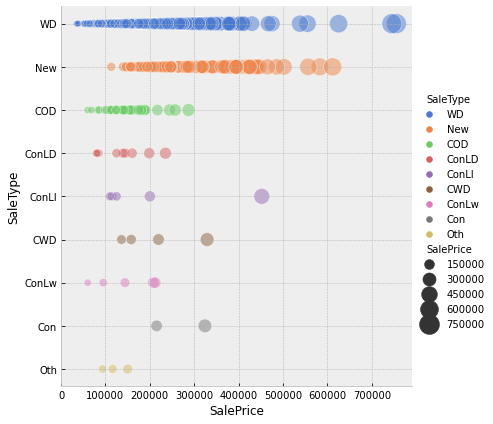

In [70]:

sns.relplot(x="SalePrice", y="SaleType",hue='SaleType',size="SalePrice",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

In [71]:
fig = px.ecdf(data, x = "SalePrice", log_x = True, log_y = True,
              color = "ExterQual", height = 500, width = 800)
fig.show()

In [72]:
# Now Lets merge these two category(Numerical and categorical)

In [73]:
df_data=pd.concat([num_data,categ_data],axis=1,join='inner')

In [74]:
df_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  Electrical  \
0          2003       196.0         706           0  ...       SBrkr   
1          1976         0.0         978           0  ...       SBrkr   
2          2002       162.0         486           0  ...       SBrkr   
3          1970         0.0         216           0  ...       SBrkr   
4          2000       350.0         655           0  ...       SBrkr   

   KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  \
0           Gd         Typ      Attchd           RFn          TA          TA   
1           TA         Typ      Attchd           RFn          TA          TA   
2           Gd         Typ      Attchd           RFn          TA          TA   
3           Gd         Typ      Detchd           Unf          TA          TA   
4           Gd         Typ      Attchd           RFn          TA          TA   

   PavedDrive  SaleType  SaleCondition  
0           Y        WD         Normal  
1           Y        WD         Normal  
2           Y        WD         Normal  
3           Y        WD        Abnorml  
4           Y        WD         Normal  

[5 rows x 68 columns]

### Machine Learning

In [75]:
# We have visualized our data so Now its time for making moodel.

In [76]:
# Lets import ML libararies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [77]:
# There are two way to handle any missing value that is, one at EDA which we did and other is at model building process
# During second one algorith find the best value which is predicted by other features.
# For eg if we have null value in LotArea than LotArea will be our dependent/target variable where as other columns includig
#SalePrice will be our independent variable.
# We can use Supervised method as well as clustering method to impute null value.
# I am going check the R2 value of model using previously discussed methods.

In [78]:
# 1st Method
y=num_data.SalePrice
x=num_data.drop('SalePrice',axis=1)

In [79]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [80]:
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
model.score(X_valid,y_valid)

0.8392540462013574

In [81]:
# 2nd Method
df=pd.read_csv('train.csv')
b=df.SalePrice
a=df.drop('SalePrice',axis=1).select_dtypes(exclude='object')

In [82]:
x_train,x_test,Y_train,y_test=train_test_split(a, b, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [83]:
# Imputation
my_imputer = SimpleImputer()
imputed_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imputed_x_test = pd.DataFrame(my_imputer.transform(x_test))

In [84]:
# Imputation removed column names; put them back
imputed_x_train.columns = x_train.columns
imputed_x_test.columns = x_test.columns
x_train=imputed_x_train
x_test=imputed_x_test

In [85]:
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8133265427745907

In [86]:
# We can choose any of these two method but I am going stick with 1st method for this project

In [87]:
y=df_data.SalePrice
X=df_data.drop('SalePrice',axis=1)

In [88]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [89]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 7 and 
                        X_train_full[cname].dtype == "object"]

In [90]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [91]:
# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [92]:
X_train.head()

MSZoning LotShape LandContour LotConfig LandSlope Condition2 BldgType  \
618       RL      Reg         Lvl    Inside       Gtl       Norm     1Fam   
870       RL      Reg         Lvl    Inside       Gtl       Norm     1Fam   
92        RL      IR1         HLS    Inside       Gtl       Norm     1Fam   
817       RL      IR1         Lvl   CulDSac       Gtl       Norm     1Fam   
302       RL      IR1         Lvl    Corner       Gtl       Norm     1Fam   

    RoofStyle MasVnrType ExterQual  ... KitchenAbvGr TotRmsAbvGrd Fireplaces  \
618       Hip    BrkFace        Ex  ...            1            9          1   
870       Hip       None        TA  ...            1            5          0   
92      Gable       None        TA  ...            1            5          0   
817       Hip    BrkFace        Gd  ...            1            7          2   
302     Gable    BrkFace        Gd  ...            1            6          1   

    GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF MoSold YrSold  
618      2007.0          3        774          0         108      7   2007  
870      1962.0          1        308          0           0      8   2009  
92       1921.0          2        432          0           0      8   2009  
817      2002.0          3        857        150          59      7   2008  
302      2001.0          3        843        468          81      1   2006  

[5 rows x 60 columns]

In [93]:
# Lets change Categorical variable into numerical using One hot encoding

In [94]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_test = X_test.drop(low_cardinality_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

#### 1. Random forest

In [95]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(OH_X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



RandomForestRegressor(random_state=0)

In [96]:
print('Random forest Test Accuracy:',model.score(OH_X_test, y_test))

Random forest Test Accuracy: 0.8355873775325431


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [97]:
predicted_price_rf=model.predict(OH_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



#### 2. Xg Booster

In [98]:
my_model = XGBRegressor(n_estimators=200, learning_rate=0.05)
my_model.fit(OH_X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(OH_X_test, y_test)],
             verbose=False)
OH_X_train, y_train

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



(      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
 618           20         90.0    11694            9            5       2007   
 870           20         60.0     6600            5            5       1962   
 92            30         80.0    13360            5            7       1921   
 817           20         69.0    13265            8            5       2002   
 302           20        118.0    13704            7            5       2001   
 ...          ...          ...      ...          ...          ...        ...   
 763           60         82.0     9430            8            5       1999   
 835           20         60.0     9600            4            7       1950   
 1216          90         68.0     8930            6            5       1978   
 559          120         69.0     3196            7            5       2003   
 684           60         58.0    16770            7            5       1998   
 
       YearRemodAdd  MasVnrArea  BsmtF

In [99]:
print('Test Accuracy:',my_model.score(OH_X_test, y_test))

Test Accuracy: 0.8318138082619049


In [100]:
predicted_price_xg=my_model.predict(OH_X_test)

#### 3. Decision Tree

In [101]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(OH_X_train, y_train)
decision_tree.score(OH_X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.702042427921781

In [102]:
predicted_price_decision_tree=decision_tree.predict(OH_X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [103]:
# lets show result on dataframe

In [104]:
models=pd.DataFrame({'Id':X_valid.index,
                    'Random_Forest':predicted_price_rf,
                    'Xg_Boost':predicted_price_xg,
                    'Actual':y_valid})

In [105]:
models

Id  Random_Forest       Xg_Boost  Actual
529    529      211235.20  192898.984375  200624
491    491      149191.65  161003.671875  133000
459    459      109596.16  113078.453125  110000
279    279      225704.10  211800.953125  192000
655    655       91391.00   89621.210938   88000
...    ...            ...            ...     ...
326    326      293694.00  269042.531250  324000
440    440      443948.89  530601.562500  555000
1387  1387      160198.24  173138.546875  136000
1323  1323       82531.04   79110.992188   82500
61      61       90624.56   92348.593750  101000

[292 rows x 4 columns]

In [106]:
# Hyperparameters: n_estimators in random forest and xg boost are the hyper parameter of the model

In [107]:
#Random Forest
neig1=np.arange(50,251,50)
test_accuracy1=[]

In [108]:
for i,k in enumerate(neig1):
    random_forest = RandomForestRegressor(n_estimators=k,random_state=50)
    # Fit with rf
    random_forest.fit(OH_X_train,y_train)
    test_accuracy1.append(random_forest.score(OH_X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarni

In [109]:
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy1),(1+test_accuracy1.index(np.max(test_accuracy1)))*50))

Best accuracy is 0.8338195235429036 with K = 150


In [110]:
test_accuracy1

[0.8327081506724721,
 0.8309882494905221,
 0.8338195235429036,
 0.8331613789911901,
 0.8324202492249384]

In [111]:
#Xg Boost
xg=np.arange(100,3000,100)
acc=[]

In [112]:
for i,k in enumerate(xg):
    my_model = XGBRegressor(n_estimators=k, learning_rate=0.05)
    my_model.fit(OH_X_train, y_train,
                 early_stopping_rounds=5, 
             eval_set=[(OH_X_test, y_test)],
             verbose=False)
    acc.append(my_model.score(OH_X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

C:\ProgramDa

In [113]:
print("Best accuracy is {} with K = {}".format(np.max(acc),(1+acc.index(np.max(acc)))*100))

Best accuracy is 0.8318138082619049 with K = 200


In [114]:
test_accuracy1.index(np.max(test_accuracy1))

2

In [115]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=50)
    # Fit with rf
random_forest.fit(OH_X_train,y_train)
test_accuracy=(random_forest.score(OH_X_test,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [116]:
my_model = XGBRegressor(n_estimators=200, learning_rate=0.05)
my_model.fit(OH_X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(OH_X_test, y_test)],
             verbose=False)
OH_X_train, y_train

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



(      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
 618           20         90.0    11694            9            5       2007   
 870           20         60.0     6600            5            5       1962   
 92            30         80.0    13360            5            7       1921   
 817           20         69.0    13265            8            5       2002   
 302           20        118.0    13704            7            5       2001   
 ...          ...          ...      ...          ...          ...        ...   
 763           60         82.0     9430            8            5       1999   
 835           20         60.0     9600            4            7       1950   
 1216          90         68.0     8930            6            5       1978   
 559          120         69.0     3196            7            5       2003   
 684           60         58.0    16770            7            5       1998   
 
       YearRemodAdd  MasVnrArea  BsmtF

In [117]:
my_model.score(OH_X_test, y_test)

0.8318138082619049

In [118]:
predicted_price_xgboost=my_model.predict(OH_X_train)

In [119]:
models=pd.DataFrame({'Id':X_valid.index,
                    'Random_Forest':predicted_price_rf,
                    'Xg_Boost':predicted_price_xg,
                    'Decision_Tree':predicted_price_decision_tree,
                    'Actual':y_valid})

In [120]:
models.head()

Id  Random_Forest       Xg_Boost  Decision_Tree  Actual
529  529      211235.20  192898.984375       235000.0  200624
491  491      149191.65  161003.671875       113000.0  133000
459  459      109596.16  113078.453125       119500.0  110000
279  279      225704.10  211800.953125       222500.0  192000
655  655       91391.00   89621.210938        89500.0   88000